In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path='./housing.csv'
house_df=pd.read_csv(path)
house_df.head()
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
result_1=house_df['total_rooms']/house_df['households']
house_df['avg_rooms_per_household']=result_1
result=house_df['total_bedrooms']/house_df['households']
house_df['avg_bedrooms_per_household']=result

house_df[['avg_bedrooms_per_household','avg_rooms_per_household']]

,avg_bedrooms_per_household,avg_rooms_per_household
0,1.023810,6.984127
1,0.971880,6.238137
2,1.073446,8.288136
3,1.073059,5.817352
4,1.081081,6.281853
...,...,...
20635,1.133333,5.045455
20636,1.315789,6.114035
20637,1.120092,5.205543
20638,1.171920,5.329513


In [4]:
new_house_df=house_df.drop(['total_rooms','total_bedrooms'],axis=1)
new_house_df.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_household,avg_bedrooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081


In [5]:
new_house_df.dropna()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_household,avg_bedrooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920


In [6]:
# Fill missing values with the mode
mode_value = new_house_df['avg_bedrooms_per_household'].mode()[0]
new_house_df['avg_bedrooms_per_household'].fillna(mode_value, inplace=True)

In [7]:
# scale the median_house_value with inflation value 1.69
new_house_df['median_house_value']=new_house_df['median_house_value']*1.69

In [8]:
display(new_house_df.head())
display(new_house_df.info())

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_household,avg_bedrooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,764894.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,605865.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,595049.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,576797.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,578318.0,NEAR BAY,6.281853,1.081081


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   population                  20640 non-null  float64
 4   households                  20640 non-null  float64
 5   median_income               20640 non-null  float64
 6   median_house_value          20640 non-null  float64
 7   ocean_proximity             20640 non-null  object 
 8   avg_rooms_per_household     20640 non-null  float64
 9   avg_bedrooms_per_household  20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

Text(0.5, 1.0, 'California Median House Value Per Median Income')

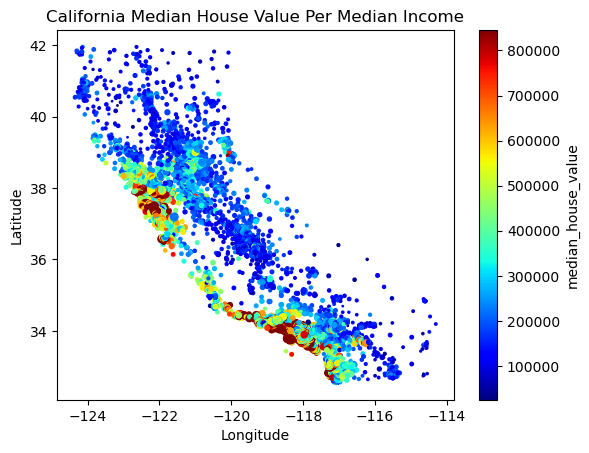

In [9]:
new_house_df.plot(kind='scatter',
                  x='longitude',
                     y='latitude',
                     c='median_house_value',
                     s=new_house_df['median_income']*2,
                     colormap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Median House Value Per Median Income')

In [10]:
# export cleaned csv to be trained 
new_house_df.to_csv('cleaned_housing_data.csv',index=False)